# Report 2: Prime Spirals

## Jillian Annis

### Introduction

A prime spiral is a plot in which only the positive integers are arranged into a spiral, with the prime numbers being highlighted in some way.  It was discovered by Polish-American mathematician Stanislaw Ulam in 1963 while he was doodling during a presentation of what he called "a long and boring paper".  He noticed that the location of the prime numbers was not random; they actually fell along diagonal lines.  

However, science fiction author Arthur Clarke described the prime spiral in his novel *The City and the Stars* which was published in 1956, seven years before Ulam's discovery.  But because Clarke never actually looked into the prime spiral, the spiral and its properties were not officially discovered until Ulam.

### Task Statement

In this report, the goal is to generate a prime spiral in a grid of at least 30 by 30 in order to identify and visualize the patterns that are present within the spiral.

### Method

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


%pylab inline will allow for the prime spiral to be generated on a plot by plotting text at an (x,y) coordinate.

In [5]:
def is_prime(P):
    for i in range(2,P):
        j=P%i
        if(j==0):
            return False
    return True

The is_prime(P) function is used to check if the number to be plotted, P, is prime or not.  It checks this by taking the modulus of P over a range of numbers, i, starting from 2 and ending at P.  A number is prime if there are only two divisors: 1 and itself.  A number is composite (not prime) if there are divisors in addition to 1 and itself.  If the modulus of P divided by i equals 0, then i is a divisor of P, and so P is composite.  Therefore, the function returns the value of False and stops executing.  If the modulus of P divided by i is not 0 for all i in range 2 to P, then the only two divisors are 1 and P, and so P is prime.  The function returns the value True.

The code below is used to generate the prime spiral.  First, the figure size, x and y limits, and the x and y tick marks are set.  Both the figure size and x and y limits are set to fully accommodate a 30 by 30 prime spiral.  The x and y ticks are removed from the plot because the (x,y) position is not important, and they could obscure a part of the prime spiral.

Before the rest of the numbers are plotted, the initial point (0,0) is plotted.  The value of this point is 1, and since 1 is not prime, it is given a smaller font size and is made the color light grey.  It is important to declare the point x,y=0,0 before the rest of the code because the x and y values must be defined and initialized, and it is from here all further (x,y) location will be derived.

Next, the variables N, P, LastMove, and NextMove are defined and initialized.  N is the number of numbers that will be plotted for each direction.  It can also be called the step size, and it has been initialized to 1.  The reason for this will be explained later.  P is the number that will be plotted, and it is set to 1 because the number 1 has already been plotted.  LastMove is the previous direction that the numbers were plotted, and it is set to Down because the next move must be Right (this can be seen further in the code).  NextMove is the next direction that the numbers must be plotted in, and it is initialized to contain no value.

The first for loop (containing Z) determines how many times the code executes to generate the prime spiral.  Directly under this is, the N value is increased by 1 for every time the code loops through entirely.

The next for loop (containing A), that is nested in the first for loop, sets the direction that the numbers must be plotted in.  A only takes on 2 values because the points are plotted in two different directions per step size, N.  For example, right then up, or left then down.  In this for loop, the new direction is set based on the previous direction, and the loop runs through this code twice, thus setting the new direction two different times.

Another for loop (containing B) is nested within the second for loop.  For every B from 1 to N, a number, P, is plotted.  First, the value of P is generated, followed by a set of if statements that apply a function to the current x,y coordinate.  These if statements generate the proper coordinate for whatever NextMove is.  For example, if NextMove is Right, then x+=1 will be applied to the current x,y coordinate to obtain the correct coordinate.  It is in this loop that the reason why N is initialized to 1 becomes clear.  Because the range function does not include the end value, the loop will run from 1 to N-1.  Thus, in order to plot the correct number of points, the N value must be 1 larger to account for the range function.

Before a number is plotted, it must be determined to be either prime or composite.  To do this, the is_prime function is called.  If the function is True, then the number is prime, and it is changed to the color indigo, bolded, and plotted in 12pt font.  If the function is False, then the number is composite, and it is changed to light grey and plotted in 10pt font.  These different font choices allow for the primes to stand out from the other numbers.

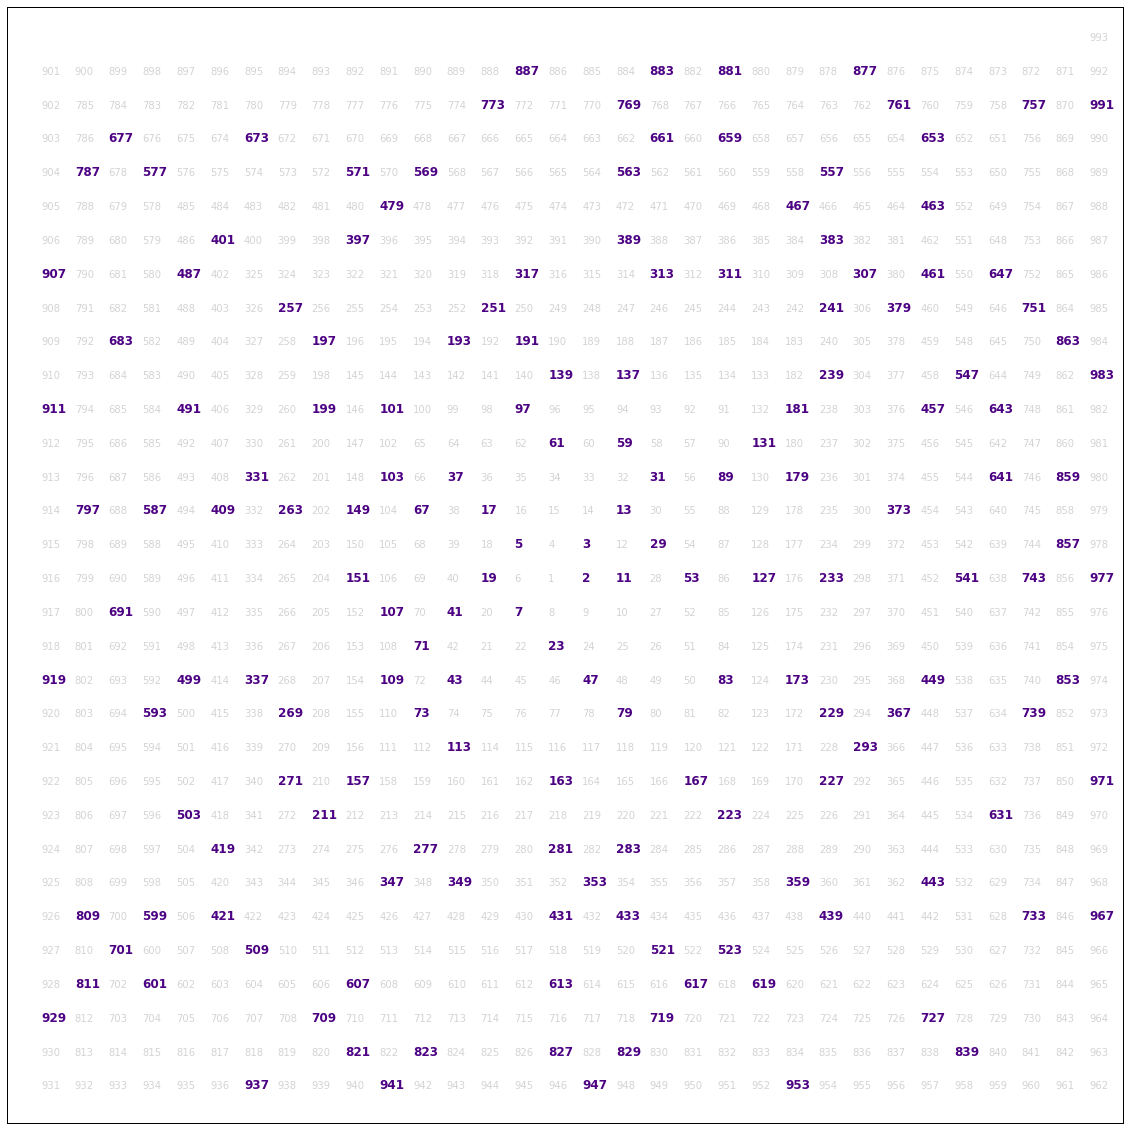

In [6]:
figure(figsize=(20,20))
xlim(-16,17)
ylim(-16,17)
xticks([])
yticks([])

x,y=0,0
text(x,y,1, color='lightgrey', fontsize='10')

N=1
P=1
LastMove='Down'
NextMove=''

for Z in range(1,32):
    N+=1
    
    for A in range(2):
        if LastMove=='Down':
            NextMove='Right'
        if LastMove=='Right':
            NextMove='Up'
        if LastMove=='Up':
            NextMove='Left'
        if LastMove=='Left':
            NextMove='Down'
        LastMove=NextMove
       
        for B in range(1,N):
            P+=1
            
            if NextMove=='Right':
                x+=1
            if NextMove=='Up':
                y+=1
            if NextMove=='Left':
                x-=1
            if NextMove=='Down':
                y-=1
    
            if is_prime(P):
                text(x,y,P, color='indigo', fontsize='12', fontweight='bold')
            else:
                text(x,y,P, color='lightgrey', fontsize='10')


### Results

Above is the prime spiral that is generated from the preceding code.  Present within the spiral are both qualitative and quantitative features.

**Qualitative:**  

The prime numbers seem to fall mainly on diagonal lines, but some horizontal and vertical lines are also present.  Also, all of the prime numbers, except 2, are odd.

**Quantitative:**  

To find any mathematical relation between the primes, let's pull out some of the prime numbers that lie along a diagonal.  

One diagonal contains: 5, 19, 41, 71, 109.  Using Wolfram Alpha, we can try to fit an equation to these numbers by typing "fit" followed by the list of numbers.  Doing this yields that the numbers can be expressed by the equation $4x^2+2x-1$.

Another diagonal contains: 227, 293, 367, 449.  Using Wolfram Alpha once again, the numbers can be generated by the equation $4x^2+54x+169$.

Last sample diagonal: 647, 751, 863, 983.  The equation obtained from Wolfram Alpha is $4x^2+92x+551$.

Based on these three sample diagonals, it can be concluded that any of the diagonals can be produced by using this general quadratic equation: $4x^2+bx+c$, where b and c are integer constants.

### Conclusion

In this report, prime spirals were explored.  The necessary code, such as the is_prime function, was created in order to generate the required 30 by 30 prime spiral.  After the spiral was made, several quantitative and qualitative observations were made about the structure of the prime spiral itself.  It was found that the primes mainly fell along diagonal lines, and that the diagonals could all be created by a general quadratic equation.

### References

Info on Prime Spirals:

1) http://mathworld.wolfram.com/PrimeSpiral.html

2) https://en.wikipedia.org/wiki/Ulam_spiral

Wolfram Alpha: https://www.wolframalpha.com/